#### module

In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt

#### hyper-parameters

In [2]:
num_data = 1000
num_epoch = 500
input_size = 1
output_size = 1
learning_rate = 0.01

#### dataset

In [3]:
x = init.uniform_(torch.Tensor(num_data, input_size), -10, 10)
x.shape

torch.Size([1000, 1])

In [4]:
y = 2*x+3

In [5]:
noise = init.normal_(torch.FloatTensor(num_data, output_size), std=0.2)
noise.shape

torch.Size([1000, 1])

In [6]:
y_noise = y + noise
label = y_noise

#### linear regression model

In [7]:
model = nn.Linear(input_size, output_size)

#### loss

L1 Loss: 
L2 Loss: 

In [8]:
loss_func = nn.L1Loss()

#### optimizer

In [9]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

#### train

In [10]:
loss_array = []
for i in range(num_epoch):
    # 기울기 초기화
    optimizer.zero_grad()
    
    output = model(x)
    
    # output과 label의 차이를 loss로 저장
    loss = loss_func(output, label)
    
    # 손실에 대한 기울기 계산
    loss.backward()
    
    # 파라미터 업데이트
    optimizer.step()
    
    if (i+1)%50 == 0:
        print(f'# epoch: {i+1:d}, loss: {loss.data:.8f}')
    
    loss_array.append(loss.detach().numpy())

# epoch: 50, loss: 2.43253279
# epoch: 100, loss: 1.84353673
# epoch: 150, loss: 1.34035146
# epoch: 200, loss: 0.83745021
# epoch: 250, loss: 0.34376904
# epoch: 300, loss: 0.15944618
# epoch: 350, loss: 0.15441902
# epoch: 400, loss: 0.15427785
# epoch: 450, loss: 0.15427354
# epoch: 500, loss: 0.15427326


#### plot

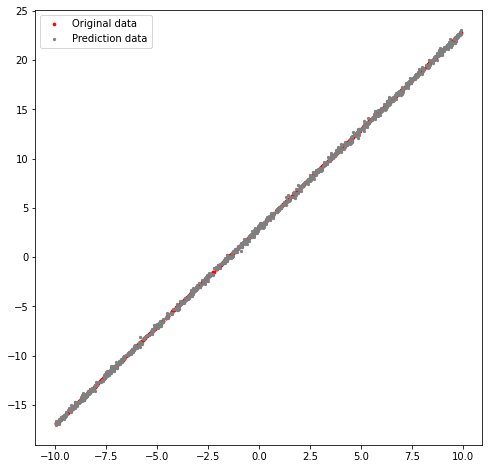

In [11]:
# Linear Regression
plt.figure(figsize=(8, 8))
plt.scatter(x.numpy(), y.numpy(), s=7, c="red", label='Original data')
plt.scatter(x.numpy(), y_noise.numpy(), s=5, c="gray", label='Prediction data')
plt.legend()
plt.show()

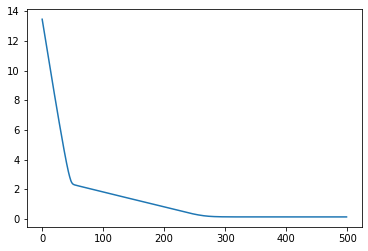

In [12]:
# Loss
plt.plot(loss_array)
plt.show()